# Fitting linecuts using the lmfit package

## Import functions

In [1]:
from nxs_analysis_tools.datareduction import load_data, Scissors
from nxs_analysis_tools.fitting import LinecutModel

from lmfit.models import GaussianModel, LinearModel

## Load data

In [2]:
data = load_data('example_data/sample_name/15/example_hkli.nxs')

data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


## Perform linecuts

In [3]:
s = Scissors(data=data)

In [4]:
linecut = s.cut_data(center=(0,0,0), window=(0.1,0.5,0.1))

Linecut axis: K
Integrated axes: ['H', 'L']


## The `LinecutModel` class

The workhorse of the fitting algorithm here is the `LinecutModel` class which wraps both the `Model` and `ModelResult` classes of the `lmfit` package, among other information.

In [5]:
lm = LinecutModel(data=linecut)

## Create `lmfit` model

Use the `.set_model_components()` method to set the model to be used for fitting the linecut. The `model_components` parameter must be a `Model` or `list` of `Model` objects.

In [6]:
lm.set_model_components([GaussianModel(prefix='peak'), LinearModel(prefix='background')])

## Set model constraints

Set constraints on the model using `.set_param_hint()`.

In [7]:
lm.set_param_hint('peakcenter', min=-0.1, max=0.1)

After the model and the hints have been specified, use the `.make_params()` method to initialize the parameters.

## Initialize parameters

In [8]:
lm.make_params()

name,value,initial value,min,max,vary,expression
peakamplitude,1.00000000,None,-inf,inf,True,
peakcenter,0.00000000,None,-0.10000000,0.10000000,True,
peaksigma,1.00000000,None,0.00000000,inf,True,
backgroundslope,1.00000000,None,-inf,inf,True,
backgroundintercept,0.00000000,None,-inf,inf,True,
peakfwhm,2.35482000,None,-inf,inf,False,2.3548200*peaksigma
peakheight,0.39894230,None,-inf,inf,False,"0.3989423*peakamplitude/max(1e-15, peaksigma)"


## Perform initial guess

Use the `.guess()` method to perform an initial guess.

In [9]:
lm.guess()

The initial values of the parameters that result can be viewed using the `.print_initial_params()` method.

In [10]:
lm.print_initial_params()

peaksigma
	min: 0
peakfwhm
	expr: 2.3548200*peaksigma
peakheight
	expr: 0.3989423*peakamplitude/max(1e-15, peaksigma)
peakcenter
	min: -0.1
	max: 0.1


These can also be accessed through the individual `LinecutModel` objects.

In [11]:
lm.params

name,value,initial value,min,max,vary,expression
peakamplitude,219.885366,219.88536567293792,-inf,inf,True,
peakcenter,0.00000000,0.0,-inf,inf,True,
peaksigma,0.06040268,0.06040268456375841,0.00000000,inf,True,
backgroundslope,2.5628e-14,2.562792784767531e-14,-inf,inf,True,
backgroundintercept,180.019533,180.01953294580167,-inf,inf,True,
peakfwhm,0.14223745,None,-inf,inf,False,2.3548200*peaksigma
peakheight,1452.27938,None,-inf,inf,False,"0.3989423*peakamplitude/max(1e-15, peaksigma)"


## Visualize the initial guesses

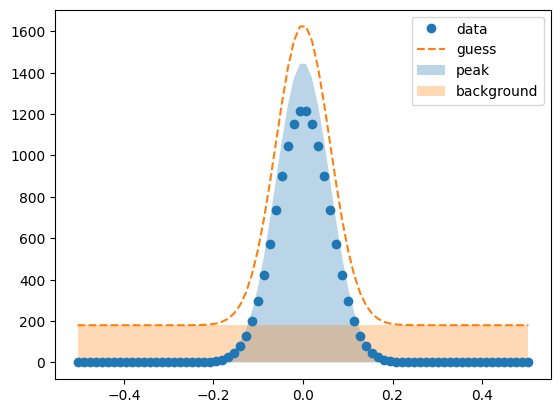

In [12]:
lm.plot_initial_guess()

## Perform the fit

In [13]:
lm.fit()

## Visualize the fit

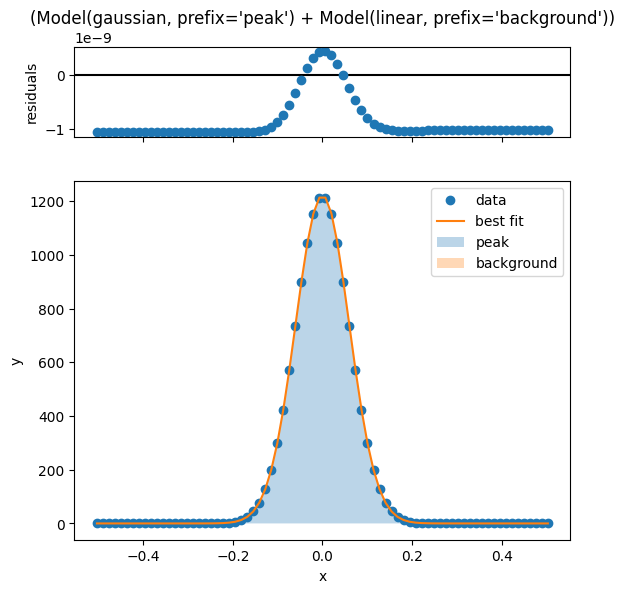

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 76
    # variables        = 5
    chi-square         = 6.7360e-17
    reduced chi-square = 9.4873e-19
    Akaike info crit   = -3149.10859
    Bayesian info crit = -3137.45492
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
    backgroundslope:      at initial value
[[Variables]]
    peakamplitude:        183.644087 (init = 219.8854)
    peakcenter:           3.7323e-15 (init = 0)
    peaksigma:            0.06000000 (init = 0.06040268)
    backgroundslope:      4.9078e-11 (init = 2.562793e-14)
    backgroundintercept: -1.0334e-09 (init = 180.0195)
    peakfwhm:             0.14128920 == '2.3548200*peaksigma'
    peakheight:           1221.05658 == '0.3989423*peakamplitude/max(1e-15, peaksigma)'


<Axes: xlabel='x', ylabel='y'>

In [14]:
lm.plot_fit()

The number of x values used to evaluate the fit curve can be set using the `numpoints` parameter, and any keyword arguments here will be passed to the `.plot()` method of the underlying `ModelResult` object.

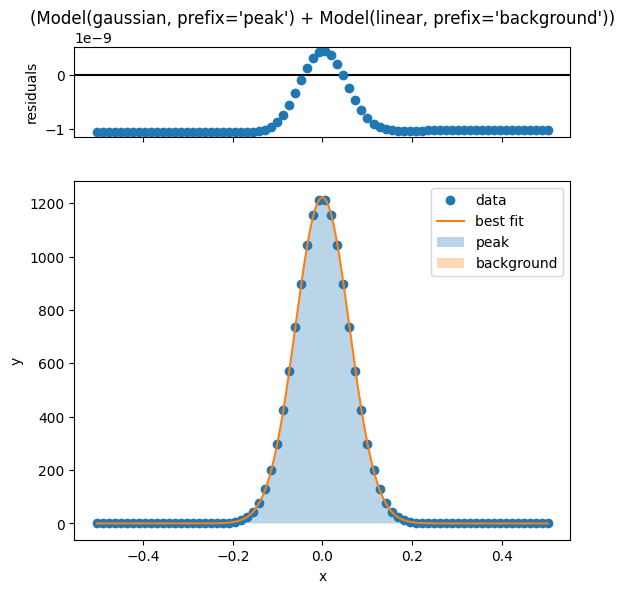

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 76
    # variables        = 5
    chi-square         = 6.7360e-17
    reduced chi-square = 9.4873e-19
    Akaike info crit   = -3149.10859
    Bayesian info crit = -3137.45492
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
    backgroundslope:      at initial value
[[Variables]]
    peakamplitude:        183.644087 (init = 219.8854)
    peakcenter:           3.7323e-15 (init = 0)
    peaksigma:            0.06000000 (init = 0.06040268)
    backgroundslope:      4.9078e-11 (init = 2.562793e-14)
    backgroundintercept: -1.0334e-09 (init = 180.0195)
    peakfwhm:             0.14128920 == '2.3548200*peaksigma'
    peakheight:           1221.05658 == '0.3989423*peakamplitude/max(1e-15, peaksigma)'


<Axes: xlabel='x', ylabel='y'>

In [15]:
lm.plot_fit(numpoints=1000)

## Access the fit values

The x and y values of the fit are stored in the `.x` (identical to the raw x values) and the `.y_fit` attributes.

In [16]:
lm.x

array([-0.503356, -0.489933, -0.47651 , ...,  0.47651 ,  0.489933,
        0.503356])

In [17]:
lm.y_fit

array([-1.057442e-09, -1.053363e-09, -1.032177e-09, ..., -9.854041e-10,
       -1.005273e-09, -1.008035e-09])

The residuals are stored within the `ModelResult` class of the lmfit package, which is stored in the `.modelresult` attribute of the `LinecutModel` class.

In [18]:
lm.modelresult.residual

array([-1.059696e-09, -1.057668e-09, -1.056797e-09, ..., -1.010025e-09,
       -1.009578e-09, -1.010289e-09])

## Viewing the fit report

In [19]:
lm.print_fit_report()

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 76
    # variables        = 5
    chi-square         = 6.7360e-17
    reduced chi-square = 9.4873e-19
    Akaike info crit   = -3149.10859
    Bayesian info crit = -3137.45492
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
    backgroundslope:      at initial value
[[Variables]]
    peakamplitude:        183.644087 (init = 219.8854)
    peakcenter:           3.7323e-15 (init = 0)
    peaksigma:            0.06000000 (init = 0.06040268)
    backgroundslope:      4.9078e-11 (init = 2.562793e-14)
    backgroundintercept: -1.0334e-09 (init = 180.0195)
    peakfwhm:             0.14128920 == '2.3548200*peaksigma'
    peakheight:           1221.05658 == '0.3989423*peakamplitude/max(1e-15, peaksigma)'
